In [4]:
!pip install -qq https://github.com/pyannote/pyannote-audio/archive/refs/heads/develop.zip

In [2]:
data = '../diarized_transcripts/audio/Talking Tech with @mkbhd - Restaurant QR codes are a crime. #shorts #thedailyshow.wav'

In [4]:
from pyannote.audio import Pipeline
pipeline = Pipeline.from_pretrained('pyannote/speaker-diarization')
diarization = pipeline({'audio': data})

Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.0.4. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file ../../../../.cache/torch/pyannote/models--pyannote--segmentation/snapshots/c4c8ceafcbb3a7a280c2d357aee9fbc9b0be7f9b/pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 2.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.0.1. Bad things might happen unless you revert torch to 1.x.


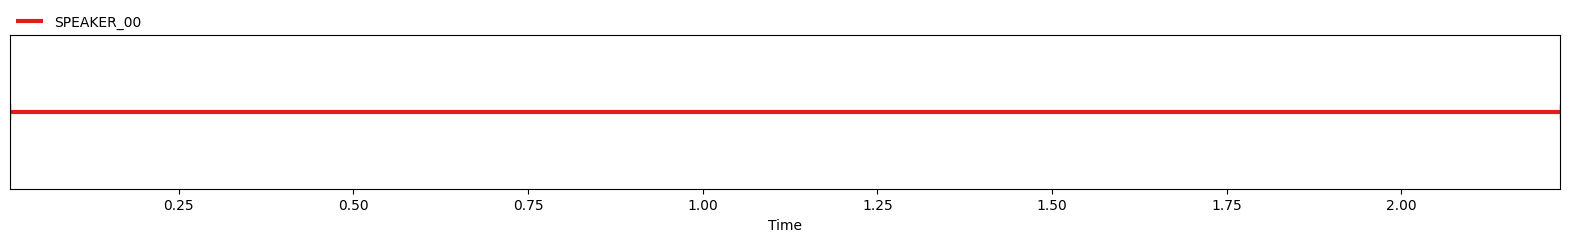

In [74]:
diarization

In [64]:
diarization.__dict__

{'_uri': 'Talking Tech with @mkbhd - Restaurant QR codes are a crime. #shorts #thedailyshow',
 'modality': None,
 '_tracks': SortedDict({<Segment(0.00853242, 56.0495)>: {'A': 'SPEAKER_00'}, <Segment(29.2406, 29.3601)>: {'C': 'SPEAKER_01'}, <Segment(52.9949, 54.0017)>: {'D': 'SPEAKER_01'}, <Segment(56.7833, 59.9915)>: {'B': 'SPEAKER_00'}}),
 '_labels': {0: None, 1: None},
 '_labelNeedsUpdate': {0: True,
  1: True,
  'SPEAKER_00': True,
  'SPEAKER_01': True},
 '_timeline': <Timeline(uri=Talking Tech with @mkbhd - Restaurant QR codes are a crime. #shorts #thedailyshow, segments=[<Segment(0.00853242, 56.0495)>, <Segment(29.2406, 29.3601)>, <Segment(52.9949, 54.0017)>, <Segment(56.7833, 59.9915)>])>,
 '_timelineNeedsUpdate': False}

In [4]:
for turn, _, speaker in diarization.itertracks(yield_label=True):
    print(f'Speaker {speaker} speaks from {turn.start:.1f}s to {turn.end:.1f}s.')

Speaker SPEAKER_00 speaks from 0.0s to 56.0s.
Speaker SPEAKER_01 speaks from 29.2s to 29.4s.
Speaker SPEAKER_01 speaks from 53.0s to 54.0s.
Speaker SPEAKER_00 speaks from 56.8s to 60.0s.


In [6]:
from transformers import pipeline

transcriber = pipeline(
  "automatic-speech-recognition",
  model="openai/whisper-base.en",
  chunk_length_s=30,
)


In [7]:
transcripts = transcriber(data, return_timestamps=True)
transcripts

{'text': " Here's my problem. My brain is melting right now because I have to juggle 100 apps just to communicate with eight people. When I was in college, there were three ways to get a hold of me. Call me if you're confident. Text me if you're shy. Email me if you're smart. Now, it's 100 apps. I message friends, Android, annoying friends, Signal, pretentious college friends, WhatsApp, annoying family members, Instagram DMs, corny randos, Twitter DMs, angry political randos, E-Vite, psychos, paperless posts, liberal psychos. That's just messaging, Marques. Yeah, so you do have the option to not try any of the things you don't want. Until I go to a restaurant, you go, hey, can I get a menu? Yeah. And they go, oh, yeah, just scan the QR code. And I go, no, no, no, I went to this restaurant to avoid being on my phone, and then they're like, oh, you have to also pay through your phone. In order to do that, you have to create a username and password. Oh, okay, so you see what I'm saying? Y

In [111]:
[(turn, speaker) for i, (turn, _, speaker) in enumerate(diarization.itertracks(yield_label=True))]

[(<Segment(0.00853242, 56.0495)>, 'SPEAKER_00'),
 (<Segment(29.2406, 29.3601)>, 'SPEAKER_01'),
 (<Segment(52.9949, 54.0017)>, 'SPEAKER_01'),
 (<Segment(56.7833, 59.9915)>, 'SPEAKER_00')]

In [22]:
# Create a dataframe with the speaker, start and end times
import pandas as pd
dfs = []
df = pd.DataFrame(columns=['speaker', 'start', 'end', 'transcript'])
texts = ''
for i, (turn, _, speaker) in enumerate(diarization.itertracks(yield_label=True)):
        for j, transcript in enumerate(transcripts['chunks']):
            text = transcript['text']
            chunk_start = transcript['timestamp'][0]
            chunk_end = transcript['timestamp'][1]
            start = chunk_start if i == 0 else turn.start
            end = turn.end

            if chunk_start >= start:
                df = pd.concat([df, pd.DataFrame([[speaker, chunk_start, chunk_end, text]], columns=['speaker', 'start', 'end', 'transcript'])])



    





In [28]:
df

,speaker,start,end,transcript
0,SPEAKER_00,0.00,0.84,Here's my problem.
0,SPEAKER_00,0.84,3.00,My brain is melting right now because I have ...
0,SPEAKER_00,3.00,6.96,100 apps just to communicate with eight people.
0,SPEAKER_00,6.96,8.68,"When I was in college, there were three ways"
0,SPEAKER_00,8.68,10.00,to get a hold of me.
0,SPEAKER_00,10.00,11.82,Call me if you're confident.
0,SPEAKER_00,11.82,13.64,Text me if you're shy.
0,SPEAKER_00,13.64,14.68,Email me if you're smart.
0,SPEAKER_00,14.68,17.48,"Now, it's 100 apps."
0,SPEAKER_00,17.48,20.56,"I message friends, Android, annoying friends,"


In [24]:
df.to_csv('../diarized_transcripts/results/timestamped_transcripts.csv')

In [29]:
df['change'] = (df['speaker'] != df['speaker'].shift(1)).astype(int)
df

,speaker,start,end,transcript,change
0,SPEAKER_00,0.00,0.84,Here's my problem.,1
0,SPEAKER_00,0.84,3.00,My brain is melting right now because I have ...,0
0,SPEAKER_00,3.00,6.96,100 apps just to communicate with eight people.,0
0,SPEAKER_00,6.96,8.68,"When I was in college, there were three ways",0
0,SPEAKER_00,8.68,10.00,to get a hold of me.,0
0,SPEAKER_00,10.00,11.82,Call me if you're confident.,0
0,SPEAKER_00,11.82,13.64,Text me if you're shy.,0
0,SPEAKER_00,13.64,14.68,Email me if you're smart.,0
0,SPEAKER_00,14.68,17.48,"Now, it's 100 apps.",0
0,SPEAKER_00,17.48,20.56,"I message friends, Android, annoying friends,",0


In [30]:
df['group'] = df['change'].cumsum()
df

,speaker,start,end,transcript,change,group
0,SPEAKER_00,0.00,0.84,Here's my problem.,1,1
0,SPEAKER_00,0.84,3.00,My brain is melting right now because I have ...,0,1
0,SPEAKER_00,3.00,6.96,100 apps just to communicate with eight people.,0,1
0,SPEAKER_00,6.96,8.68,"When I was in college, there were three ways",0,1
0,SPEAKER_00,8.68,10.00,to get a hold of me.,0,1
0,SPEAKER_00,10.00,11.82,Call me if you're confident.,0,1
0,SPEAKER_00,11.82,13.64,Text me if you're shy.,0,1
0,SPEAKER_00,13.64,14.68,Email me if you're smart.,0,1
0,SPEAKER_00,14.68,17.48,"Now, it's 100 apps.",0,1
0,SPEAKER_00,17.48,20.56,"I message friends, Android, annoying friends,",0,1


In [31]:
df_grouped = df.groupby(['group', 'speaker'], as_index=False).agg({
    'start': 'first',
    'end': 'last',
    'transcript': ' '.join
})

In [32]:
df_grouped.drop(columns=['group'], inplace=True)
df_grouped

,speaker,start,end,transcript
0,SPEAKER_00,0.00,59.8,Here's my problem. My brain is melting right...
1,SPEAKER_01,32.28,59.8,"That's just messaging, Marques. Yeah, so you..."
2,SPEAKER_00,58.40,59.8,six steps harder.


In [33]:
df_grouped.to_csv('../diarized_transcripts/results/grouped_transcripts.csv', index=False)